## 复习上一章实例--图像融合

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim==2:
        plt.imshow(img,cmap="gray")
    elif img.ndim==3:
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)#cv.cvtColor函数第一个参数输入只能是np.uint8类型
        plt.imshow(img)
    plt.show()

In [3]:
a = cv.imread("pic/petal500x500.jpg")
b = cv.imread("pic/hedgehog500x500.jpg")
m = cv.imread("pic/mask500x500.jpg")

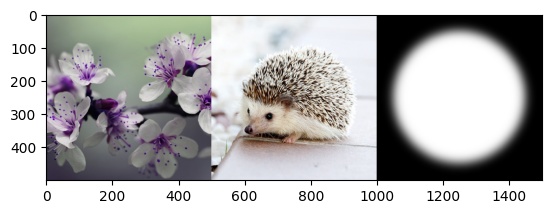

In [4]:
show(np.hstack([a,b,m]))

In [5]:
m = m/255

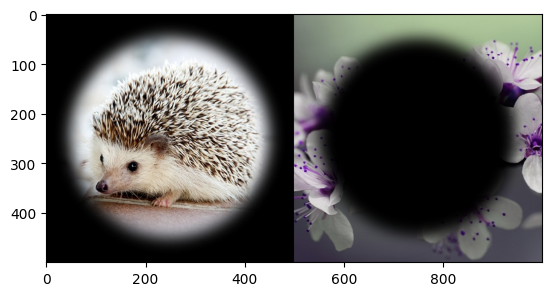

In [6]:
petal = a*(1-m)
hedgehog =b*m
show(np.uint8(np.hstack([hedgehog,petal])))

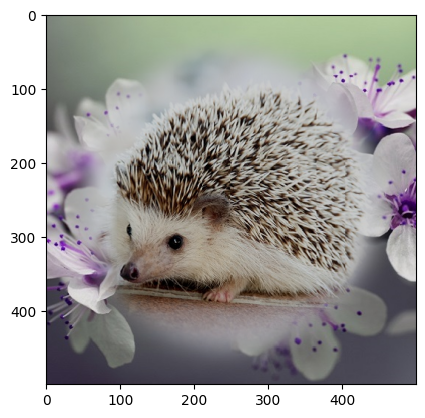

In [7]:
res = petal+hedgehog*0.8
show(np.uint8(res))

In [8]:
cv.imwrite("images/图像融合复习.jpg",res)

True

## 1.图像的裁剪、放大和缩小

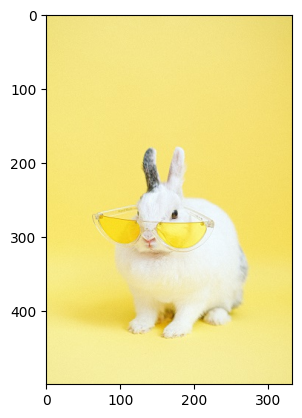

In [9]:
img = cv.imread("pic/rabbit500x333.jpg")
show(img)

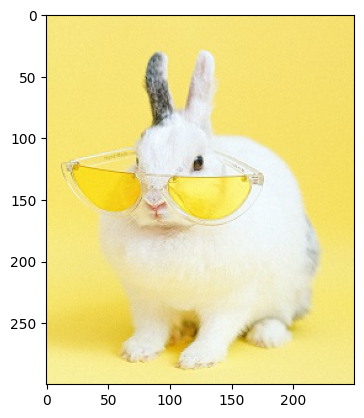

In [10]:
rabbit = img[150:450,50:300,:]
show(rabbit)

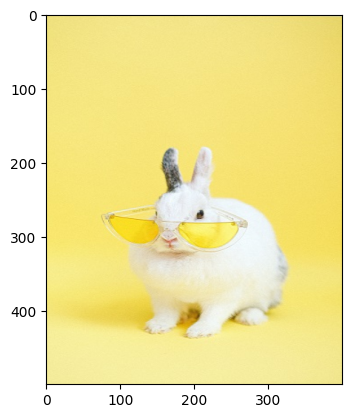

In [11]:
#opencv(x y)与numpy (y x)不同
img2 = cv.resize(img,(400,500))
show(img2)

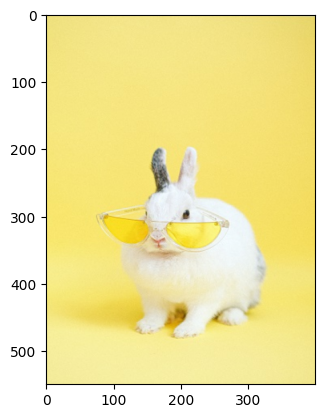

In [23]:
img3 = cv.resize(img,(400,550),interpolation=cv.INTER_LINEAR)
show(img3)

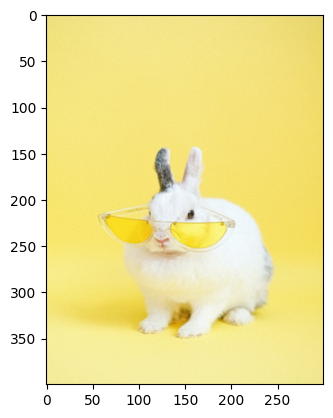

In [24]:
#图像缩小
img4 = cv.resize(img,(300,400),interpolation=cv.INTER_AREA)
show(img4)

## 2.图像平移

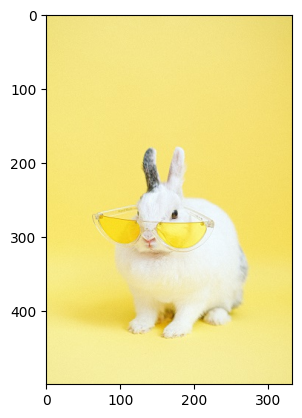

In [14]:
img = cv.imread("pic/rabbit500x333.jpg")
show(img)

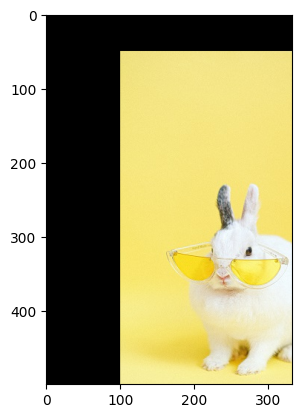

In [15]:
M = np.array([
[1,0,100],
 [0,1,50]
],dtype=np.float32)
img2 = cv.warpAffine(img,M,(333,500))
show(img2)

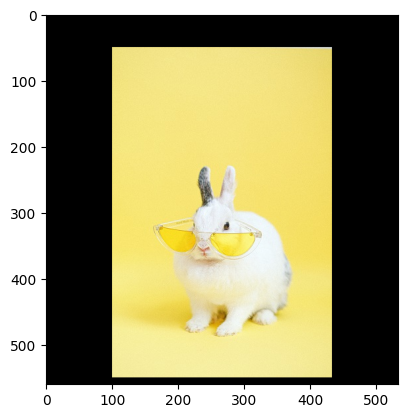

In [16]:
M = np.array([
[1,0,100],
 [0,1,50]
],dtype=np.float32)
img2 = cv.warpAffine(img,M,(533,560))
show(img2)

## 3.错切变换

(320, 320, 3)


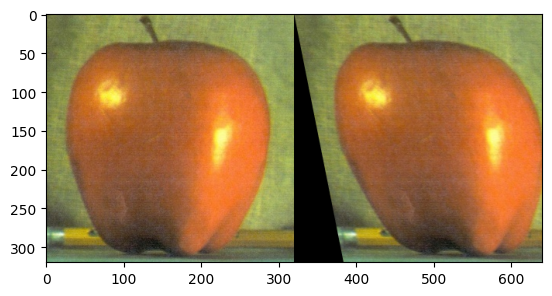

In [28]:
img=cv.imread("pic/apple.jpg")
print(img.shape)
M = np.array([
[1,0.2,0],
[0,1,0]
])
img3 = cv.warpAffine(img,M,(320,320))
show(np.hstack([img,img3]))

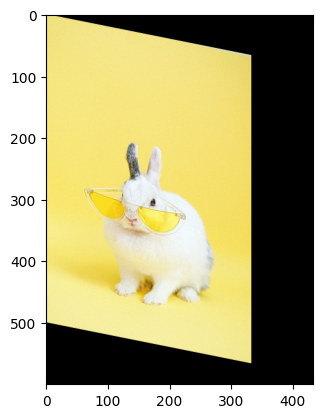

In [18]:
#垂直错切
M = np.array([
[1,0,0],
[0.2,1,0]
])
img4 = cv.warpAffine(img,M,(433,600))
show(img4)

## 4.镜像变换

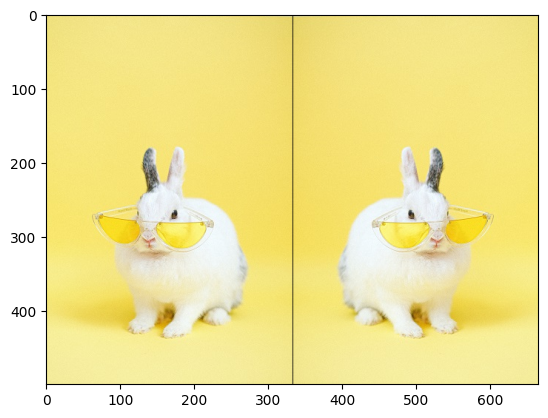

In [19]:
#水平镜像
Mx = np.array([
[-1,0,333],
[0,1,0]
],dtype=np.float32)
img5 = cv.warpAffine(img,Mx,(333,500))
show(np.hstack([img,img5]))

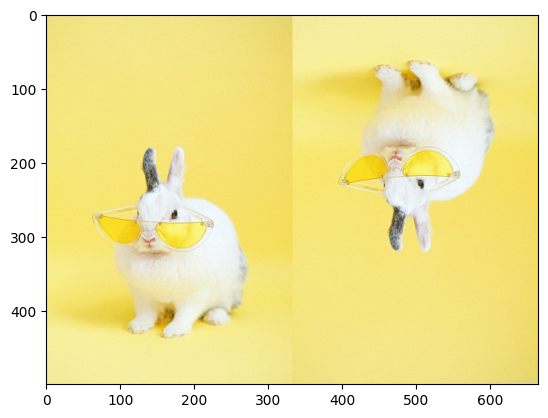

In [20]:
#垂直镜像
My = np.array([
[1,0,0],
[0,-1,500]
],dtype=np.float32)
img6 = cv.warpAffine(img,My,(333,500))
show(np.hstack([img,img6]))

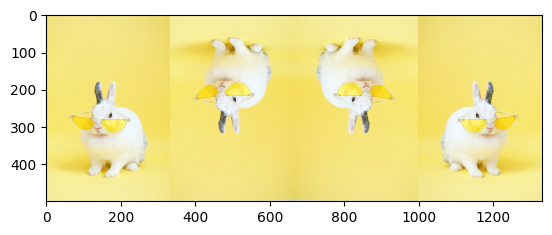

In [21]:
#官方提供的函数
img7 = cv.flip(img,0)
img8 = cv.flip(img,-1)
img9 = cv.flip(img,1)
show(np.hstack([img,img7,img8,img9]))

## 5.旋转变换

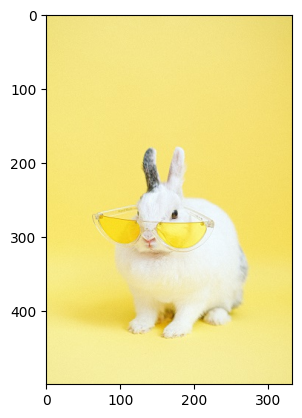

In [29]:
img = cv.imread("pic/rabbit500x333.jpg")
show(img)

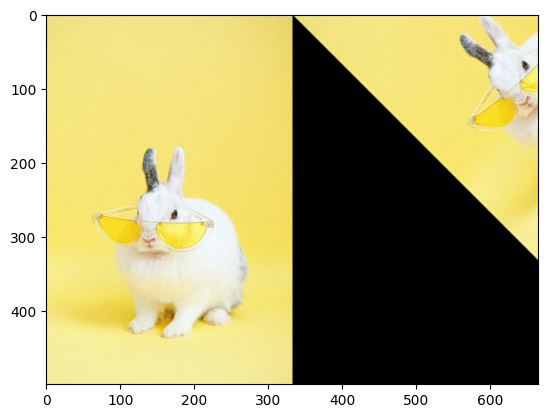

In [35]:
#相对原点旋转
beta = np.pi/4
M = np.array([
[np.cos(beta),np.sin(beta),0],
[-np.sin(beta),np.cos(beta),0]
])
img10 = cv.warpAffine(img,M,(333,500))
show(np.hstack([img,img10]))

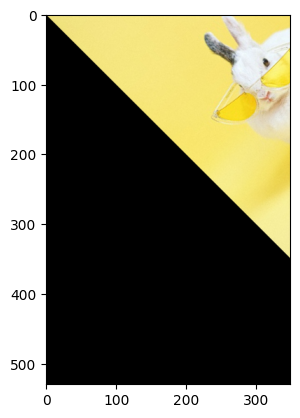

In [36]:
img11 = cv.warpAffine(img,M,(350,530))
show(img11)

In [37]:
#cv官方函数实现
M1 = cv.getRotationMatrix2D((0,0),45,1)
M1

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ]])

In [38]:
h,w,c =img.shape
M2 = cv.getRotationMatrix2D((w/2,h/2),45,1)
M2

array([[   0.70710678,    0.70710678, -128.00997436],
       [  -0.70710678,    0.70710678,  190.95658377]])

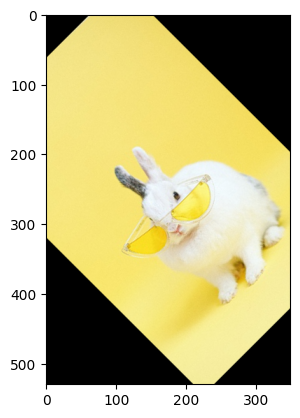

In [39]:
img12 = cv.warpAffine(img,M2,(350,530))
show(img12)

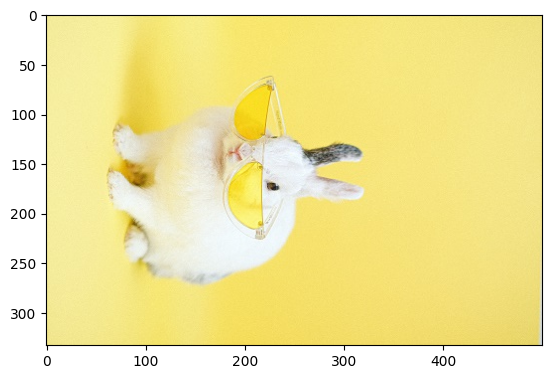

In [40]:
img13 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
show(img13)